# Plotting planar fields from Critic2 output files

In this example we plot the electron deformation density (EDD) of four different variants of the imidazole molecule as plotted in [doi:10.1021/acs.jpcc.3c06054](https://doi.org/10.1021/acs.jpcc.3c06054).

The process can be divided in tw steps:

* Creating the plane vectors used as input for *Critic2* to calculate the planar field.
* Parsing the output files from *Critic2* and importing them into the plot class.
* Plotting the data.

## Calculating the plane vectors

First, the plane vectors are calculated using the input structures read from the quantume espresso input-file. We use the ``read_input_structure`` function of the ``io`` sub-package. The periodic boundary conditions are removed to avoid the inclusion of periodic replicas in the plane calculation. The plane itself is calculated using the ``calculate_planes`` analysis function of the ``Structure`` object:

In [1]:
from aim2dat.io.qe import read_input_structure
from aim2dat.strct import Structure
from aim2dat.strct.ext_analysis import calculate_planes

functional_groups = {
    "H": (True, False),
    "CH3": (False, True),
    "Cl": (True, False),
    "Br": (True, False),
}
proj_positions = []

for fct_grp in functional_groups:
    struct_dict = read_input_structure(f"files/el_def_density_critic2/pw.scf_{fct_grp}.in")
    struct_dict["pbc"] = False
    del struct_dict["cell"]
    structure = Structure(**struct_dict)
    plane = calculate_planes(structure, threshold=0.01, margin=1.2)[0]
    print(
        f"{fct_grp}:",
        f"{plane['plane'][0][0]:.3f} {plane['plane'][0][1]:.3f} {plane['plane'][0][2]:.3f} "
        f"{plane['plane'][1][0]:.3f} {plane['plane'][1][1]:.3f} {plane['plane'][1][2]:.3f} "
        f"{plane['plane'][2][0]:.3f} {plane['plane'][2][1]:.3f} {plane['plane'][2][2]:.3f} ",
    )
    proj_positions.append(plane["proj_positions"])

H: 4.874 11.443 7.500 10.954 13.584 7.500 7.078 5.182 7.500 
CH3: 13.120 7.213 8.497 7.065 5.108 8.502 10.808 13.862 8.512 
Cl: 4.845 12.147 7.500 10.956 14.004 7.500 6.941 5.248 7.500 
Br: 4.839 12.328 7.500 10.951 14.121 7.500 6.912 5.262 7.500 


Each plane is defined by three vectors serving as input for *Critic2*. The method also calculates the projected positions of the atoms which we store in the ``proj_positions`` list for later use in the plot class.

## Parsing and importing the critic2 field data into the ``PlanarFieldPlot`` class

Once the calculation of the EDD (or any other field) has finished sucessfully the data can be parsed making use of the ``read_plane`` function of the ``io`` sub-package:

In [2]:
from aim2dat.io.critic2 import read_plane

plane_data = []

for fct_grp in functional_groups:
    plane_data.append(read_plane(f"files/el_def_density_critic2/rhodef_{fct_grp}"))

Now, we can initiate an instance of the ``PlanarFieldPlot`` class of the ``plots`` sub-package and import the planes with the corresponding atom labels:

In [3]:
from aim2dat.plots import PlanarFieldPlot

pf_plot = PlanarFieldPlot()
for (fct_grp, frg_det), pd0, pos0 in zip(functional_groups.items(), plane_data, proj_positions):
    pf_plot.import_field(fct_grp, **pd0, text_labels=pos0, flip_lr=frg_det[0], flip_ud=frg_det[1])

## Plotting the field

Before plotting the data we specify a few plotting parameters: 

In [4]:
pf_plot.ratio = [5, 6]
pf_plot.equal_aspect_ratio = True
pf_plot.norm = "symlog"
pf_plot.color_map = "RdBu_r"
pf_plot.contour_filled = True
pf_plot.vmin = -10.0
pf_plot.vmax = 10.0
pf_plot.show_colorbar = True

Now we are ready to plot the field for the first molecule. 
Red fraction of the heatmap highlight electron accumulation in comparison to the case of isolated atoms and blue electron depletation.
Thus, the character of the covalent bonds is visualized as the red areas between the atoms.

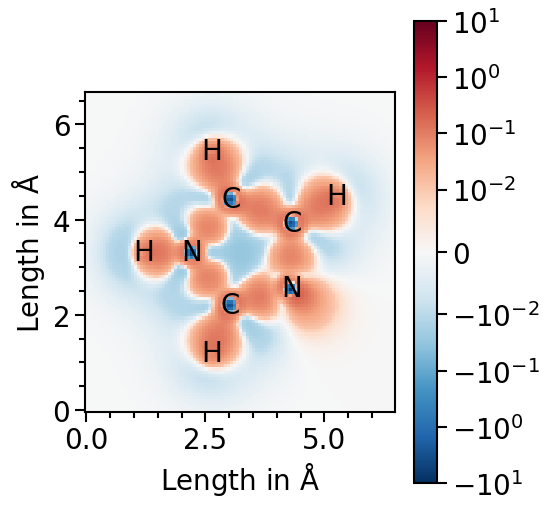

In [5]:
pf_plot.plot("H")

We can also plot all molecules side by side:

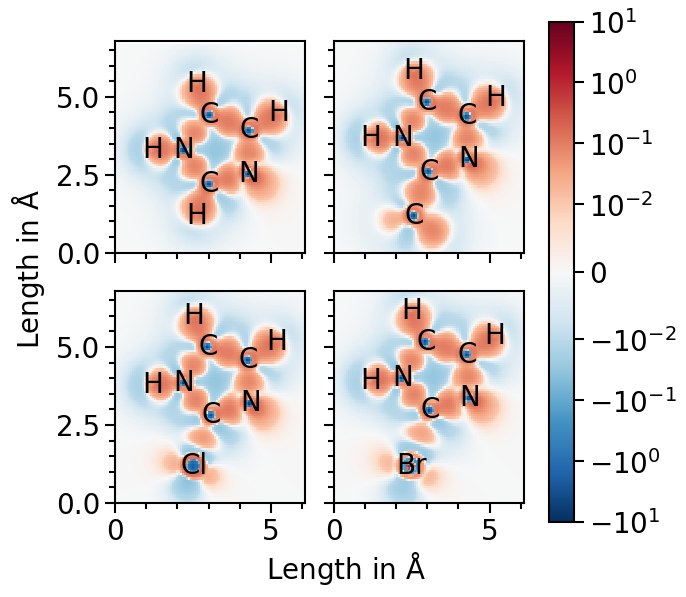

In [6]:
pf_plot.ratio = (7, 6.5)
pf_plot.x_range = [0.0, 6.1]
pf_plot.y_range = [0.0, 6.8]
pf_plot.subplot_nrows = 2
pf_plot.subplot_ncols = 2
pf_plot.subplot_sharex = True
pf_plot.subplot_sharey = True
pf_plot.subplot_wspace = 0.15
pf_plot.subplot_hspace = 0.0001
pf_plot.subplot_sup_x_label = r"Length in $\mathrm{\AA}$"
pf_plot.subplot_sup_y_label = r"Length in $\mathrm{\AA}$"
pf_plot.subplot_share_colorbar = True
pf_plot.subplot_adjust = {"left": 0.17, "bottom": 0.11}
pf_plot.auto_set_axis_properties(set_x_label=False, set_y_label=False)
pf_plot.x_label = None
pf_plot.y_label = None
pf_plot.plot(pf_plot.data_labels, subplot_assignment=[0, 1, 2, 3])